<center><b>In the name of God</b></center>

<b>Course</b>: Machine Learning
<br>
<b>Description:</b> HomeWork 1 | Question 2
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [13]:
# Import Allowed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load

In [14]:
# Load Data
data = pd.read_excel("CSM_dataset.xlsx")
# Remove last redundant row
data = data[:-1]

In [15]:
data

Movie    Year  Ratings  Genre        Gross       Budget  \
0                   13 Sins  2014.0      6.3    8.0       9130.0    4000000.0   
1            22 Jump Street  2014.0      7.1    1.0  192000000.0   50000000.0   
2            3 Days to Kill  2014.0      6.2    1.0   30700000.0   28000000.0   
3    300: Rise of an Empire  2014.0      6.3    1.0  106000000.0  110000000.0   
4         A Haunted House 2  2014.0      4.7    8.0   17300000.0    3500000.0   
..                      ...     ...      ...    ...          ...          ...   
226                Child 44  2015.0      6.4    4.0    1210000.0   50000000.0   
227                   Aloha  2015.0      5.5   15.0   21000000.0   37000000.0   
228     Unfinished Business  2015.0      5.4    8.0   10200000.0   35000000.0   
229                War Room  2015.0      5.4    1.0   12300000.0    3000000.0   
230             The Gallows  2015.0      4.4   15.0   22600000.0     100000.0   

     Screens  Sequel  Sentiment      Views    Likes  Dislikes  Comments  \
0       45.0     1.0        0.0  3280543.0   4632.0     425.0     636.0   
1     3306.0     2.0        2.0   583289.0   3465.0      61.0     186.0   
2     2872.0     1.0        0.0   304861.0    328.0      34.0      47.0   
3     3470.0     2.0        0.0   452917.0   2429.0     132.0     590.0   
4     2310.0     2.0        0.0  3145573.0  12163.0     610.0    1082.0   
..       ...     ...        ...        ...      ...       ...       ...   
226     66.0     1.0        4.0  3701061.0   9325.0     641.0    1859.0   
227   2815.0     1.0       13.0  7119456.0  18803.0    1128.0    2290.0   
228   2777.0     1.0        7.0  3450614.0   6823.0     325.0     409.0   
229      NaN     1.0       10.0    66872.0    400.0      67.0     201.0   
230   2720.0     1.0       -5.0   659772.0   2841.0     431.0     606.0   

     Aggregate Followers  
0              1120000.0  
1             12350000.0  
2               483000.0  
3               568000.0  
4              1923800.0  
..                   ...  
226                  NaN  
227                  NaN  
228                  NaN  
229                  NaN  
230                  NaN  

[231 rows x 14 columns]

# Handle Null Values

In [16]:
data.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

In [17]:
data = data.fillna(data.mean())

# Preprocessing

In [18]:
del data["Movie"]

In [19]:
data=(data-data.min())/(data.max()-data.min())

# Correlation

In [20]:
def correlation(feature1_values, feature2_values):
    """
    Calculate correlation between two features
    
    feature1_values: the list of values for the first feature
    feature2_values: the list of values for the second feature 
    """
    
    faeture1_std = np.std(feature1_values)
    feature2_std = np.std(feature2_values)
    covariance = np.cov(feature1_values, feature2_values)[1,0]
    return float("{:.2f}".format(covariance/(faeture1_std*feature2_std)))
    

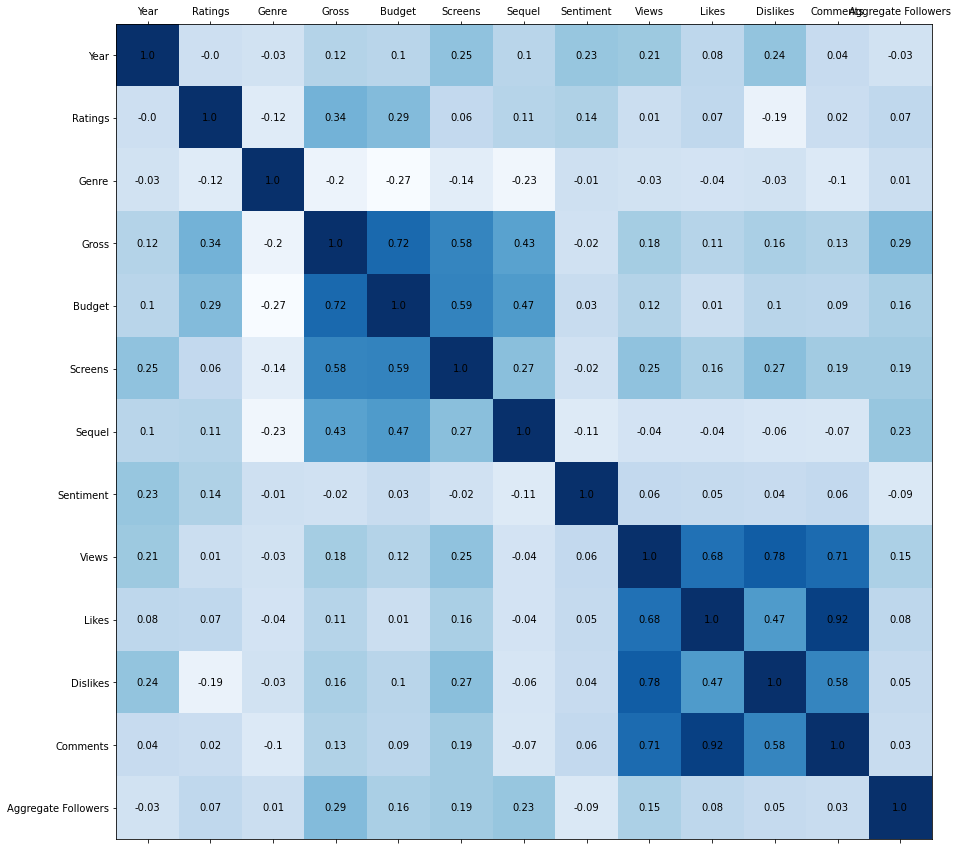

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data_columns = list(data.columns) 

correlation_matrix = np.zeros((len(data_columns), len(data_columns)))

for i, column1 in enumerate(data_columns):
    for j, column2 in enumerate(data_columns):
        correlation_matrix[i, j] = correlation(data[column1].values, data[column2].values)
        

ax.matshow(correlation_matrix, cmap=plt.cm.Blues)
# plt.rcParams["figure.autolayout"] = True

for i, column1 in enumerate(data_columns):
    for j, column2 in enumerate(data_columns):
        c = correlation_matrix[j,i]

        ax.text(i, j, str(c), va='center', ha='center')
                
column_labels = data_columns
row_labels = data_columns

ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(column_labels)))

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)        

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()

In [22]:
redundant_columns = ["Budget", "Views", "Comments"] 

# Train and Test Split

In [25]:
if False:
    # Shuffling
    data = data.sample(frac=1, random_state=0)

    # Save for same shuffling!
    data.to_csv("CSM_dataset_shuffled.csv")
else:
    data = pd.read_csv("CSM_dataset_shuffled.csv").drop(columns=["Unnamed: 0"])    

In [ ]:
data = data.drop(columns = redundant_columns)

In [26]:
data

Year   Ratings     Genre     Gross    Budget   Screens    Sequel  \
0     1.0  0.821429  0.000000  0.076979  0.119754  0.640907  0.000000   
1     0.0  0.589286  0.642857  0.001722  0.048734  0.000694  0.000000   
2     1.0  0.196429  0.142857  0.258162  0.159765  0.843128  0.000000   
3     1.0  0.571429  0.071429  0.085378  0.123755  0.788755  0.666667   
4     0.0  0.535714  0.142857  0.121303  0.279798  0.712864  0.000000   
..    ...       ...       ...       ...       ...       ...       ...   
226   0.0  0.464286  0.500000  0.000009  0.009323  0.510700  0.000000   
227   1.0  0.696429  0.000000  0.065160  0.079742  0.660111  0.000000   
228   0.0  0.732143  0.000000  0.158628  0.219782  0.748265  0.000000   
229   0.0  0.446429  0.500000  0.000043  0.000000  0.001620  0.000000   
230   1.0  0.535714  0.500000  0.251941  0.295803  0.841971  0.166667   

     Sentiment         Views     Likes  Dislikes  Comments  \
0     0.656716  3.517488e-01  0.109283  0.099069  0.115606   
1     0.567164  1.226013e-07  0.000000  0.000000  0.000026   
2     0.701493  9.764848e-01  0.134662  1.000000  0.237703   
3     0.761194  7.826956e-02  0.027151  0.033238  0.022704   
4     0.567164  3.050014e-04  0.000054  0.000072  0.000000   
..         ...           ...       ...       ...       ...   
226   0.567164  3.746153e-02  0.014983  0.013825  0.008732   
227   0.567164  9.031244e-02  0.051815  0.044771  0.048015   
228   0.567164  2.168491e-01  0.042793  0.041117  0.051247   
229   0.567164  2.831014e-02  0.003792  0.007665  0.003441   
230   0.567164  1.696840e-01  0.079368  0.131805  0.033392   

     Aggregate Followers  
0               0.097880  
1               0.000283  
2               0.030453  
3               0.075605  
4               0.000090  
..                   ...  
226             0.047115  
227             0.000034  
228             0.057976  
229             0.189714  
230             0.005896  

[231 rows x 13 columns]

In [27]:
# 80% for train, 20% for test
data
data_train = data.head(185)
data_test = data.tail(46)

In [28]:
data_train

Year   Ratings     Genre     Gross    Budget   Screens    Sequel  \
0     1.0  0.821429  0.000000  0.076979  0.119754  0.640907  0.000000   
1     0.0  0.589286  0.642857  0.001722  0.048734  0.000694  0.000000   
2     1.0  0.196429  0.142857  0.258162  0.159765  0.843128  0.000000   
3     1.0  0.571429  0.071429  0.085378  0.123755  0.788755  0.666667   
4     0.0  0.535714  0.142857  0.121303  0.279798  0.712864  0.000000   
..    ...       ...       ...       ...       ...       ...       ...   
180   0.0  0.660714  0.785714  0.079001  0.239787  0.801018  0.000000   
181   1.0  0.750000  0.000000  1.000000  0.599888  0.988431  0.500000   
182   0.0  0.410714  0.500000  0.002827  0.010923  0.103424  0.000000   
183   0.0  0.589286  0.142857  0.065315  0.143760  0.780657  0.166667   
184   1.0  0.160714  0.000000  0.081956  0.479854  0.923878  0.000000   

     Sentiment         Views     Likes  Dislikes  Comments  \
0     0.656716  3.517488e-01  0.109283  0.099069  0.115606   
1     0.567164  1.226013e-07  0.000000  0.000000  0.000026   
2     0.701493  9.764848e-01  0.134662  1.000000  0.237703   
3     0.761194  7.826956e-02  0.027151  0.033238  0.022704   
4     0.567164  3.050014e-04  0.000054  0.000072  0.000000   
..         ...           ...       ...       ...       ...   
180   0.641791  7.800980e-02  0.010695  0.027077  0.014441   
181   0.582090  2.802372e-01  0.093766  0.076934  0.133123   
182   0.567164  1.447928e-02  0.001805  0.007450  0.009905   
183   0.552239  1.176206e-02  0.003317  0.009241  0.005943   
184   0.865672  2.317015e-01  0.065219  0.252436  0.186091   

     Aggregate Followers  
0               0.097880  
1               0.000283  
2               0.030453  
3               0.075605  
4               0.000090  
..                   ...  
180             0.041217  
181             0.199135  
182             0.005770  
183             0.008885  
184             0.028358  

[185 rows x 13 columns]

In [29]:
x_train = data_train.drop(columns =["Ratings"]).values
y_train = data_train["Ratings"].values

x_test = data_test.drop(columns = ["Ratings"]).values
y_test = data_test["Ratings"].values

# Multivariate

In [89]:
class Multivariate():
    def __init__(self, number_variables):
        self.number_variables = number_variables
    
        self.a = np.zeros(number_variables)
        self.c = 0
        # Coefficients of multivariate: a[n-1]*x[n-1] + a[n-2]*x[n-2] + ... + a[1]*(x[1]) + a[0]*x[0] + c
        
    def single_apply(self, x):
        """
        Apply the multivariate to a point
        
        x: a point
        """
        return np.dot(x, self.a) + c
    
    def apply(self, x):
        """ 
        Apply the multivariate to an array of points
        
        x: array of points
        """
        return np.array(self.single_apply(x))
    
    
    def set_params(self, a, c):
        """ Setter for params"""
        self.a = a
        self.c = c
    
    def get_params(self):
        """ Getter for params"""
        return self.a, self.c
    

# Loss Function

In [90]:
class LossFunction():
        
    @staticmethod
    def mse(y_predict, y_real):
        """ Mean Square Error """
        arr = (np.subtract(y_real,y_predict))**2
        return np.sum(arr) / len(y_predict)
    
    @staticmethod
    def partial_mse_a(y_predict, y_real, x, index):
        """ Partial derivation of Mean Square Error for coeficient of feature of multivariat"""
        arr = np.multiply(x[:, index], (np.subtract(y_real, y_predict)))    
        return -2*np.sum(arr)/len(x)
    
    @staticmethod
    def partial_mse_c(y_predict, y_real):
        """ Partial derivation of Mean Square Error for consist coefficient of multivariat"""
        arr = np.subtract(y_real, y_predict) 
        return -2*np.sum(arr)/len(y_real)
        
    

# Gradient Descent

In [126]:
class MultivariateGradientDescent():
    """ This class try to match a pattern to train data with Gradient Descent method """
        
    def __init__(self, number_epoch, number_variables):
        """
        Create a MultivariateGradientDescent
        
        number_epoch: The required number of epochs
        number_variables: The number of variables
        
        """
        
        # Learning rate configuration
        self.learning_rate_initial = 1
        self.learning_rate = self.learning_rate_initial
        self.decrease_learning_rate = self.learning_rate_initial / number_epoch
            
        # Array for storing error and learning values 
        self.train_error = []
        self.test_error = []
        self.learning_rate_value = []
    
        self.number_epoch = number_epoch
        
        self.multivariate = Multivariate(number_variables=number_variables)
        
        
    def run(self):
        """ Run Gradient Descent! """
        for epoch in range(self.number_epoch):
            self._collect_epoch_statistic(epoch)
            
            a_new = []
            y_predict = self.multivariate.apply(x_train)
            
            a_cur, c_cur = self.multivariate.get_params()
            
            for i, ai in enumerate(a_cur):
                ai_new = ai - self.learning_rate * LossFunction.partial_mse_a(y_predict, y_train, x_train, i)
                a_new.append(ai_new)
            
            c_new = LossFunction.partial_mse_c(y_predict, y_train)
                
            self.multivariate.set_params(np.array(a_new), c_new)
            self.learning_rate -= self.decrease_learning_rate
            
        self._collect_epoch_statistic(epoch)
            
    def _collect_epoch_statistic(self, epoch):
        """ Collect statistics per epoch """
        self.learning_rate_value.append(self.learning_rate)
        
        y_predict = self.multivariate.apply(x_train)
        self.train_error.append(LossFunction.mse(y_predict, y_train))
        
        y_predict = self.multivariate.apply(x_test)
        self.test_error.append(LossFunction.mse(y_predict, y_test))
    
    def plot_train_test_error(self):
        """ Plot train error and test error over epochs """
        x = np.arange(0, self.number_epoch+1)
        
        plt.plot(x, self.train_error, color="green", label="Train Error")
        plt.plot(x, self.test_error, color="red", label="Test Error")
        plt.legend()
        plt.title(f"Train Error VS Test Error \n")
        
        plt.xlabel("Epoch")
        plt.ylabel("Error")
        plt.show()
    
        y_predict = self.multivariate.apply(x_train)
        train_error = LossFunction.mse(y_predict, y_train)
        
        y_predict = self.multivariate.apply(x_test)
        test_error = LossFunction.mse(y_predict, y_test)
        
        print(f"Final Train Error= {train_error}")
        print(f"Final Test Error= {test_error}")
    
    
    def plot_learning_rate_value(self):
        """ Plot changing of the learning rate over epochs """
        x = np.arange(0, self.number_epoch+1)
        
        plt.plot(x, self.learning_rate_value, color = "yellow")
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title(f"Learning Rete Changes \n {self._configuration_title()}")
        plt.show()
    

In [127]:
multivariate_gradient_descent = MultivariateGradientDescent(number_epoch = 10000, number_variables = len(x_train[0]))

In [128]:
multivariate_gradient_descent.run()

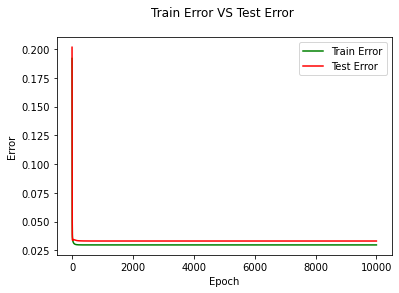

Final Train Error= 0.02978111051444727
Final Test Error= 0.03316660481517752


In [129]:
multivariate_gradient_descent.plot_train_test_error()

In [130]:
y_predict = multivariate_gradient_descent.multivariate.apply(x_test)

In [131]:
y_test

array([0.66071429, 0.55357143, 0.53571429, 0.57142857, 0.625     ,
       0.28571429, 0.67857143, 0.32142857, 0.16071429, 0.75      ,
       0.42857143, 0.5       , 0.42857143, 0.92857143, 0.57142857,
       0.625     , 0.30357143, 0.46428571, 0.67857143, 0.71428571,
       0.625     , 0.64285714, 0.76785714, 0.44642857, 0.83928571,
       0.92857143, 0.82142857, 0.71428571, 0.73214286, 0.67857143,
       0.51785714, 0.66071429, 0.57142857, 0.69642857, 0.33928571,
       0.85714286, 0.875     , 0.41071429, 0.53571429, 0.48214286,
       0.26785714, 0.46428571, 0.69642857, 0.73214286, 0.44642857,
       0.53571429])

In [125]:
for i in range(len(y_predict)):
    print(y_predict[i], " ", y_test[i])

0.7890644377569895   0.6607142857142857
0.5172647638583805   0.5535714285714286
0.45139633993642214   0.5357142857142857
0.6212688032178588   0.5714285714285714
0.8524616043224826   0.625
0.5816121730390601   0.2857142857142857
0.5650974471955408   0.6785714285714287
0.6400372927244165   0.3214285714285715
0.531775098225286   0.1607142857142857
0.6682569371169953   0.7499999999999999
0.5917847514776005   0.4285714285714286
0.4613375407689192   0.5000000000000001
0.42646860910436923   0.4285714285714286
0.6775998244227462   0.9285714285714288
0.7368684160542822   0.5714285714285714
0.5540056009652267   0.625
0.573022739891759   0.3035714285714285
0.5849773694688072   0.4642857142857143
0.6620417670528427   0.6785714285714287
0.35091909253810927   0.7142857142857143
0.5485843534838806   0.625
0.6008915251423055   0.6428571428571429
0.9535432150512367   0.767857142857143
0.6205719408770731   0.4464285714285714
0.48937323502694663   0.8392857142857142
0.7015855367462445   0.928571428571428